In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None)

# MLPC

In [2]:
arr_algo_1 = np.load('array_algo_1.npy', allow_pickle=True)
arr_algo_1[0, 0:5]

array([8600432.0, 'Description du poste', 0, 0.24681146442890167,
       0.05224579572677612], dtype=object)

In [3]:
df_algo_1 = pd.DataFrame(arr_algo_1)
nb_cat_bin = df_algo_1[2].value_counts()
nb_cat_bin

2
1    1859
0    1752
Name: count, dtype: int64

## Préparation du dataset

In [4]:
X = arr_algo_1[:, 3:] # vecteurs d'embedding
Y = arr_algo_1[:, 2] # variable cible 0 / 1

In [5]:
X = X.astype(float)
Y = Y.astype(int)
print(X.dtype)
print(Y.dtype)

float64
int32


In [6]:
# seed random
import random

seed = random.randint(0, 1000)
print(f"Seed utilisée : {seed}")

Seed utilisée : 339


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=seed, stratify=Y)

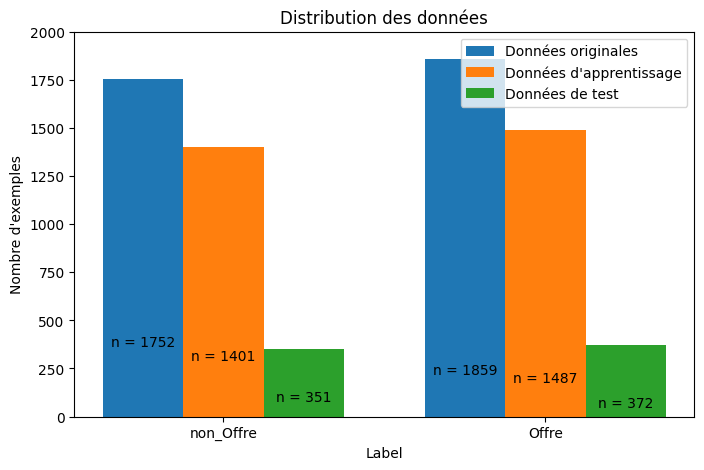

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5), dpi=100)

plt.title("Distribution des données")

plt.hist([Y, y_train, y_test],
         bins = [x - 0.5 for x in range(0, 3)],
         rwidth=0.75,
         label=["Données originales", "Données d'apprentissage", "Données de test"])

plt.annotate("n = " + str(np.sum(Y == 0)), (-0.25, 365.0), ha='center')
plt.annotate("n = " + str(np.sum(y_train == 0)), (0.0, 293.0), ha='center')
plt.annotate("n = " + str(np.sum(y_test == 0)), (0.25, 80.0), ha='center')

plt.annotate("n = " + str(np.sum(Y == 1)), (0.75, 220.0), ha='center')
plt.annotate("n = " + str(np.sum(y_train == 1)), (1.0, 178.0), ha='center')
plt.annotate("n = " + str(np.sum(y_test == 1)), (1.25, 50.0), ha='center')

plt.xticks(np.arange(2), ("non_Offre", "Offre"))

plt.xlabel("Label")
plt.ylabel("Nombre d'exemples")

plt.ylim(0.0, 2000.0)

plt.legend()

plt.show()

## Standardisation des données

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Recherche meilleurs hyperparamètres

In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
# GridSearchCV

nbre_couches = [1, 2]
nbre_neurones = [1, 2, 3, 5, 8, 10]

hidden_layer_size_combi = []
for n_couche in nbre_couches:
    for n_neurone in nbre_neurones:
        hidden_layer_size_combi.append(tuple([n_neurone] * n_couche)) # Génération des combinaisons de tailles de couches cachées
# Ajout des permutations de tailles de neurones dans chaque couche
import itertools
for n_couche in nbre_couches:
    for permutation in itertools.permutations(nbre_neurones, n_couche):
        hidden_layer_size_combi.append(permutation)
print(hidden_layer_size_combi)

param_grid = {'hidden_layer_sizes':hidden_layer_size_combi,
                    'activation': ['identity', 'logistic', 'tanh', 'relu'],
                     'solver': ['lbfgs', 'sgd', 'adam'],
                      'alpha' : [0.1, 0.01, 0.001, 0.0001]
             }

model = MLPClassifier(max_iter=10000, random_state=0, max_fun=15000)


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=5, scoring='accuracy',
                           n_jobs=-1, verbose=2)

grid_search.fit(scaled_X_train, y_train)

# Afficher les meilleurs paramètres trouvés
print(f"Meilleurs paramètres : {grid_search.best_params_}")

[(1,), (2,), (3,), (5,), (8,), (10,), (1, 1), (2, 2), (3, 3), (5, 5), (8, 8), (10, 10), (1,), (2,), (3,), (5,), (8,), (10,), (1, 2), (1, 3), (1, 5), (1, 8), (1, 10), (2, 1), (2, 3), (2, 5), (2, 8), (2, 10), (3, 1), (3, 2), (3, 5), (3, 8), (3, 10), (5, 1), (5, 2), (5, 3), (5, 8), (5, 10), (8, 1), (8, 2), (8, 3), (8, 5), (8, 10), (10, 1), (10, 2), (10, 3), (10, 5), (10, 8)]
Fitting 5 folds for each of 2304 candidates, totalling 11520 fits


In [ ]:
stop;:%|\

# Entrainement avec meilleurs hyperparamètres

In [ ]:
mlpc = MLPClassifier(activation=, hidden_layer_sizes=, 
                     max_iter=10000,
              random_state=seed, solver=)

mlpc.fit(scaled_X_train, y_train)

## Prédictions jeu de train

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
y_pred_train = svc.predict(X_train)

In [ ]:
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

print('Accuracy:', accuracy_train)
print('Precision:', precision_train)
print('Recall:', recall_train)
print('F1-score:', f1_train)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_train, y_pred_train, labels=svc.classes_, normalize='true')

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svc.classes_, )                                          
disp.plot(cmap='Blues')

plt.show()

## Prédictions jeu de test

In [ ]:
y_pred = svc.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

In [ ]:
import seaborn as sns

names = ['Vrai Négatif (VN)', 'Faux Positif (FP)','Faux Négatif (FN)', 'Vrai Positif (VP)']
counts = ["{0:0.0f}\n".format(value) for value in confusion_matrix(y_test, y_pred, normalize=None).flatten()]
percentages = ["{0:.2%}".format(value) for value in confusion_matrix(y_test, y_pred, normalize='true').flatten()]

box_labels = [f"{v1}\n{v2}{v3}" for v1, v2, v3 in zip(names, counts, percentages)]
box_labels = np.asarray(box_labels).reshape(cm.shape[0],cm.shape[1])

plt.figure(figsize=(8,5), dpi=100)

plt.title("Matrice de confusion (test dataset)")

sns.heatmap(cm,
            vmin=0.0,
            vmax=1.0,
            cmap='Blues',
            annot=box_labels,
            fmt='',
            xticklabels=['non_competences', 'competences'],
            yticklabels=['non_compétences', 'competences'])

plt.xlabel("Valeurs prédites")
plt.ylabel("Valeurs réelles")

plt.show()

## Observations des mauvaises prédictions

In [ ]:
df_train, df_test = train_test_split(df_algo_1, test_size=0.20, random_state=seed, stratify=Y)
df_test['true']=y_test
df_test['pred']=y_pred

In [ ]:
# Faux négatifs
df_test.loc[(df_test['true'] == 1) & (df_test['pred'] == 0)]

In [ ]:
# Faux positifs
df_test.loc[(df_test['true'] == 0) & (df_test['pred'] == 1)]

## Enregistrement du modèle

In [ ]:
import joblib
from joblib import dump

#dump(svc, 'svc_1.joblib')